# Explore here

In [28]:
# Your code here

import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv')
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [29]:
df.to_csv('../data/raw/df_raw.csv', index=False)

Limpieza de la Base de Datos

In [30]:
df.shape

(48895, 16)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [32]:
df['id'].duplicated().sum() 

0

In [33]:
df.drop(['id','name','last_review','host_name','reviews_per_month'], axis=1, inplace=True)

In [34]:
df.shape

(48895, 11)

Analisis de variables univariantes

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns  


Analisis de las variables categoricas

<function matplotlib.pyplot.show(close=None, block=None)>

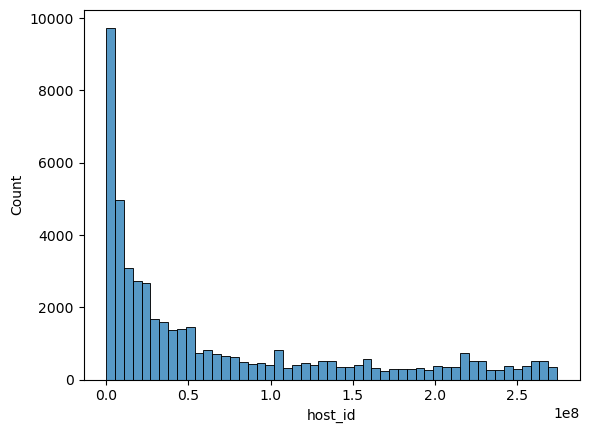

In [36]:
sns.histplot(data=df, x='host_id')
plt.show

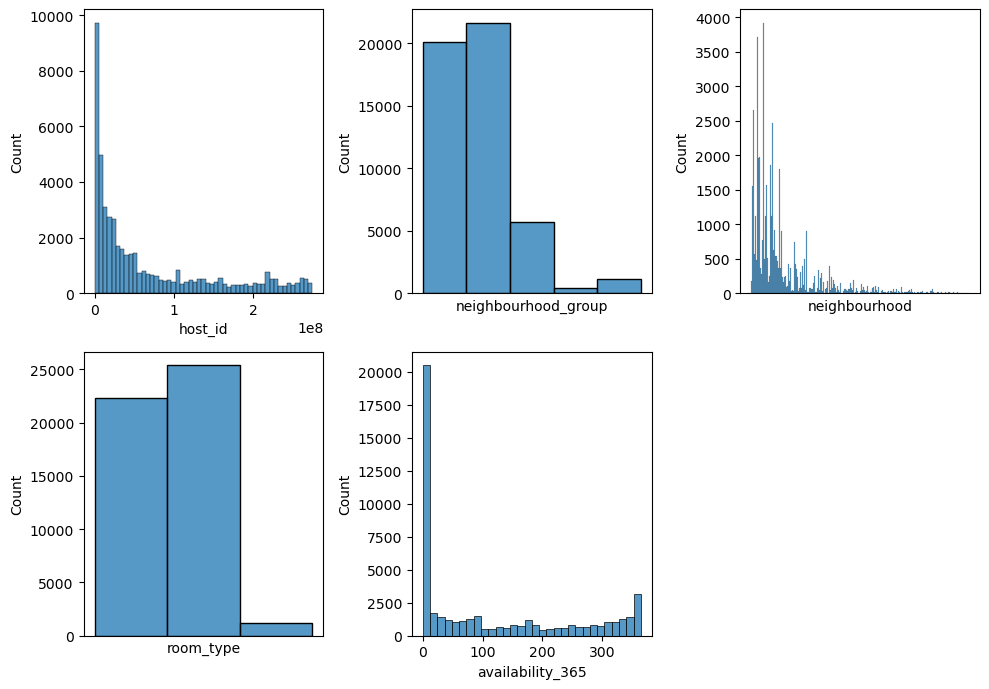

In [37]:
fig, axis = plt.subplots(2, 3, figsize=(10, 7))
sns.histplot(ax=axis[0, 0], data=df, x='host_id')
sns.histplot(ax=axis[0, 1], data=df, x='neighbourhood_group').set_xticks([  ])
sns.histplot(ax=axis[0, 2], data=df, x='neighbourhood').set_xticks([  ])
sns.histplot(ax=axis[1, 0], data=df, x='room_type').set_xticks([  ])
sns.histplot(ax=axis[1, 1], data=df, x='availability_365')
fig.delaxes(axis[1, 2])
plt.tight_layout()
plt.show()

Analisis de variables numericas

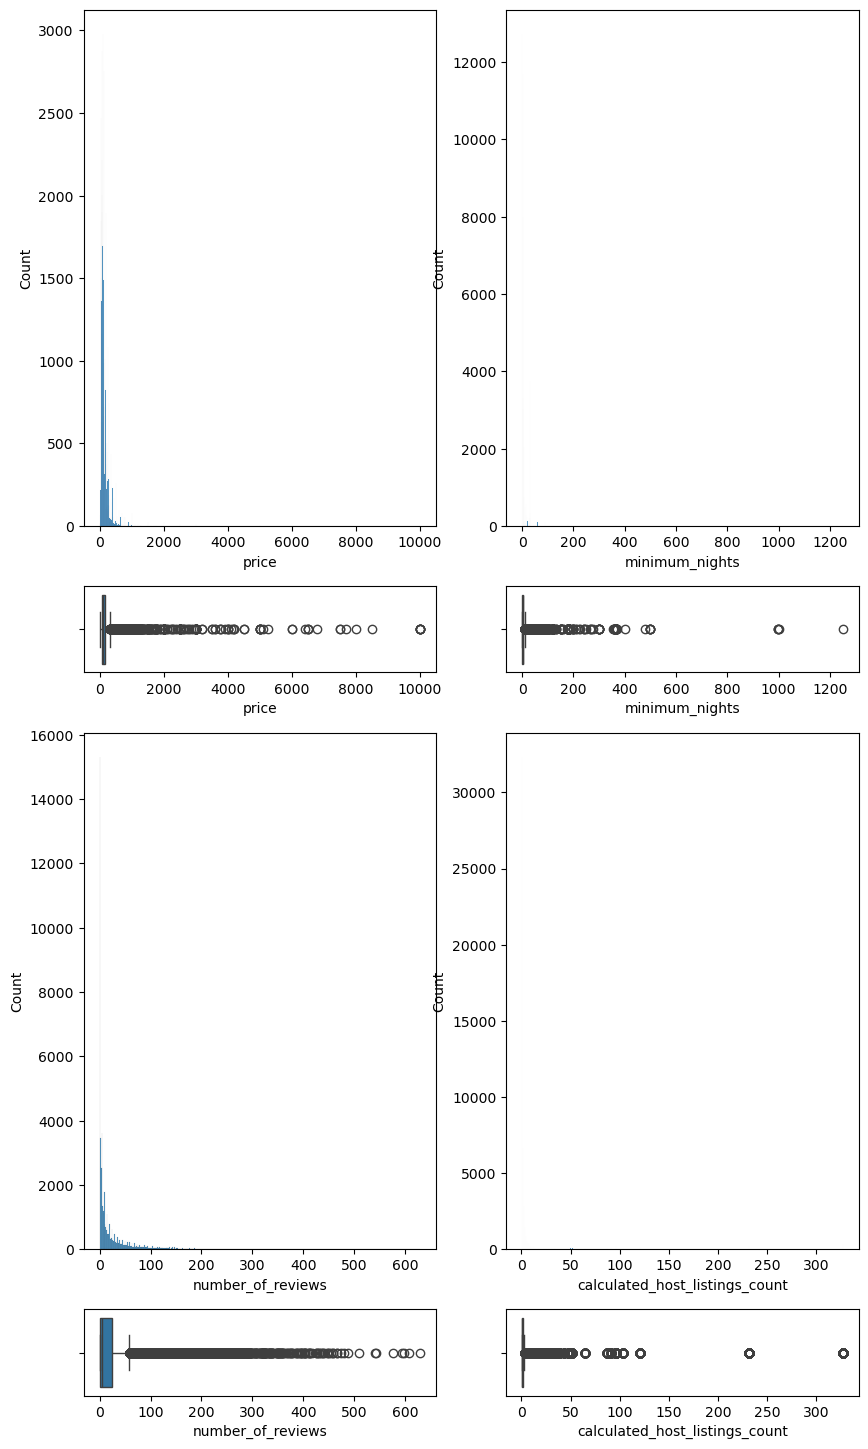

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,327.000000,365.000000


In [39]:
fig, axis = plt.subplots(4, 2, figsize=(10, 18),gridspec_kw={"height_ratios":[6,1,6,1]})

sns.histplot(ax=axis[0, 0], data=df, x='price')
sns.boxplot(ax=axis[1, 0], data=df, x='price')

sns.histplot(ax=axis[0, 1], data=df, x='minimum_nights')
sns.boxplot(ax=axis[1, 1], data=df, x='minimum_nights')

sns.histplot(ax=axis[2, 0], data=df, x='number_of_reviews')
sns.boxplot(ax=axis[3, 0], data=df, x='number_of_reviews')

sns.histplot(ax=axis[2, 1], data=df, x='calculated_host_listings_count')
sns.boxplot(ax=axis[3, 1], data=df, x='calculated_host_listings_count')

plt.tight_layout
plt.show()
df.describe()

